In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import scipy.interpolate as si
from numpy import linspace,exp
from numpy.random import randn
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

%matplotlib inline # % starts the magic code - google search for built-in magic commands

UsageError: unrecognized arguments: # % starts the magic code - google search for built-in magic commands


## LinReg

In [20]:
X = np.array([2, 4, 8, 12, 18, 20])
y = np.array([1, 3, 5, 9, 19, 21])

In [21]:
print(np.mean(X))
print(np.mean(y))

10.6666666667
9.66666666667


In [22]:
print(X - np.mean(X))
print(y - np.mean(y))

[-8.66666667 -6.66666667 -2.66666667  1.33333333  7.33333333  9.33333333]
[ -8.66666667  -6.66666667  -4.66666667  -0.66666667   9.33333333
  11.33333333]


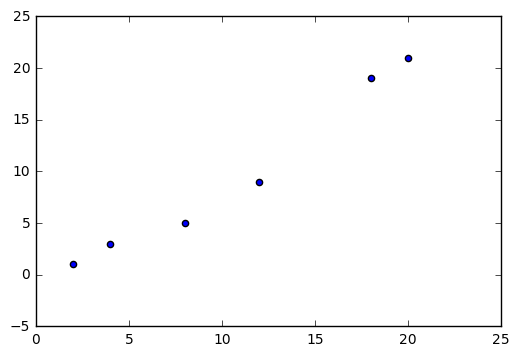

In [23]:
plt.scatter(X,y)
plt.show()

In [24]:
B1 = sum((X - np.mean(X)) * (y - np.mean(y))) / sum((X - np.mean(X))**2)
B0 = np.mean(y) - (B1 * np.mean(X))
print(B0, B1)

-2.42574257426 1.13366336634


In [25]:
# alternatively
B1, B0 = np.polyfit(X, y, 1)
print(B0, B1)

-2.42574257426 1.13366336634


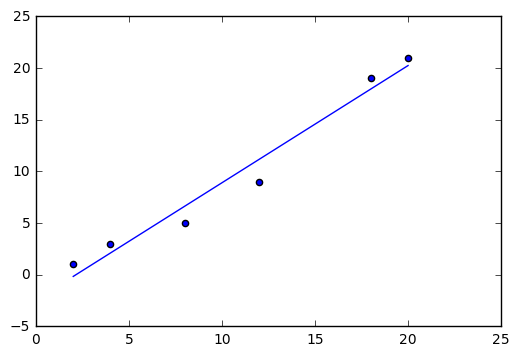

In [26]:
# Create a list of values in the best fit line
abline_values = [B1 * i + B0 for i in X]

# Plot the best fit line over the actual values
plt.scatter(X,y)
plt.plot(X, abline_values, 'b')
plt.show()

In [27]:
y_hat = 0.4 + 0.8 * X
print(y_hat)

[  2.    3.6   6.8  10.   14.8  16.4]


In [28]:
y_err = y_hat - y
print(y_err)

[ 1.   0.6  1.8  1.  -4.2 -4.6]


In [29]:
y_err_sq = y_err**2
print(y_err_sq)

[  1.     0.36   3.24   1.    17.64  21.16]


In [30]:
RMSE = (sum(y_err_sq) / len(y))**.5
print(RMSE)

2.72029410175


In [31]:
RMSE == (sum((y_hat-y)**2) / len(y))**.5

True

In [32]:
X_reg = np.array([[x] for x in X])

In [33]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_reg, y)
print(reg.coef_[0])
print(reg.intercept_)

1.13366336634
-2.42574257426


In [34]:
round(B1, 5) == round(reg.coef_[0], 5)

True

In [35]:
round(B0, 5) == round(reg.intercept_, 5)

True

## PolynomialReg

In [36]:
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X_reg)

In [37]:
X_

array([[  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02],
       [  1.00000000e+00,   1.20000000e+01,   1.44000000e+02,
          1.72800000e+03],
       [  1.00000000e+00,   1.80000000e+01,   3.24000000e+02,
          5.83200000e+03],
       [  1.00000000e+00,   2.00000000e+01,   4.00000000e+02,
          8.00000000e+03]])

In [41]:
reg = linear_model.LinearRegression()
reg.fit (X_, y)
print(reg.coef_)
print(reg.intercept_)

[ 0.          0.02127992  0.06607715 -0.00081573]
1.15029858187


In [42]:
X = np.array([2, 4, 8, 12, 18, 20])
y = np.array([1, 3, 5, 9, 19, 21])
pfit = np.polyfit(X, y, 3)

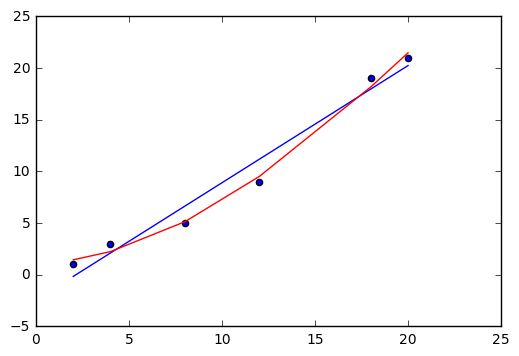

In [43]:
p = np.poly1d(pfit)
plt.scatter(X,y)
plt.plot(X, abline_values, 'b')
plt.plot(X, p(X), '-', color="red")
plt.show()

In [44]:
pfit

array([ -8.15730438e-04,   6.60771487e-02,   2.12799245e-02,
         1.15029858e+00])

In [45]:
# http://stackoverflow.com/questions/24612626/b-spline-interpolation-with-python
x = X

t = range(len(x))
ipl_t = np.linspace(0.0, len(x) - 1, 100)

x_tup = si.splrep(t, x, k=3)
y_tup = si.splrep(t, y, k=3)

x_list = list(x_tup)
xl = x.tolist()
x_list[1] = xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

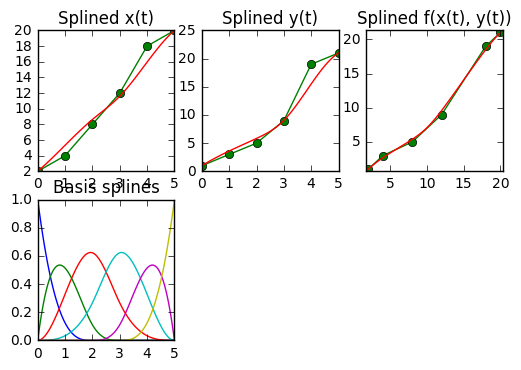

In [46]:
fig = plt.figure()

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(7):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i)
plt.xlim([0.0, max(t)])
plt.title('Basis splines')
plt.show()

## smooth splining

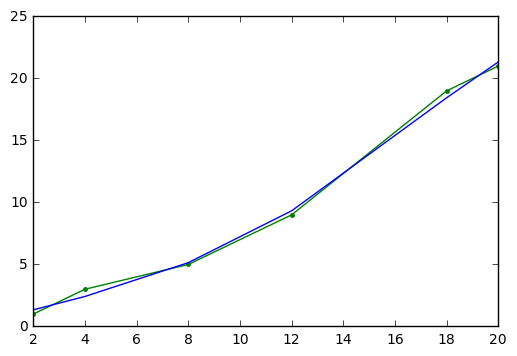

In [47]:
s = UnivariateSpline(x, y, s=1)
xs = x
ys = s(xs)
plt.plot(x, y, '.-', color="green")
plt.plot(xs, ys, color="blue")
plt.show()

## macro data

In [48]:
import csv

with open('macro.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    data = list(reader)

In [49]:
gdp = np.array([float(x[2]) for x in data[1:]])
trade = np.array([float(x[-1]) for x in data[1:]])

In [50]:
y = gdp
X = trade

In [51]:
print(np.mean(X))
print(np.mean(y))

57.0762536314
3.25422300771


In [52]:
print(X - np.mean(X))
print(y - np.mean(y))

[ -4.74533476e+01  -4.70927076e+01  -4.69871336e+01  -4.66403236e+01
  -4.65809036e+01  -4.57979836e+01  -4.58585436e+01  -4.53092036e+01
  -4.33037036e+01  -3.96529936e+01  -4.05541436e+01  -3.98413336e+01
  -3.95352636e+01  -3.89003436e+01  -3.73434036e+01  -3.55656836e+01
  -3.65373036e+01  -3.85065336e+01  -3.92603736e+01  -3.90472636e+01
  -3.98725436e+01  -3.98453036e+01  -3.87820736e+01  -3.76627276e+01
  -3.64378896e+01  -1.86215836e+01  -1.69145836e+01  -1.60105136e+01
  -1.43077636e+01  -1.29109236e+01  -1.32263536e+01  -1.43981236e+01
  -1.31915336e+01  -1.06608236e+01  -6.58294363e+00  -8.91463363e+00
  -1.09545936e+01  -9.07314363e+00  -5.84969363e+00  -2.14422363e+00
  -1.30464363e+00  -2.75125363e+00  -8.49270363e+00  -8.67417363e+00
  -3.55280363e+00  -2.76805363e+00  -3.61515363e+00  -4.91942363e+00
  -4.99885863e+00  -7.14377763e+00  -1.91443536e+01  -1.92459336e+01
  -1.93132936e+01  -1.51507936e+01  -1.42783636e+01  -1.29919136e+01
  -1.35655636e+01  -1.42090436e+01

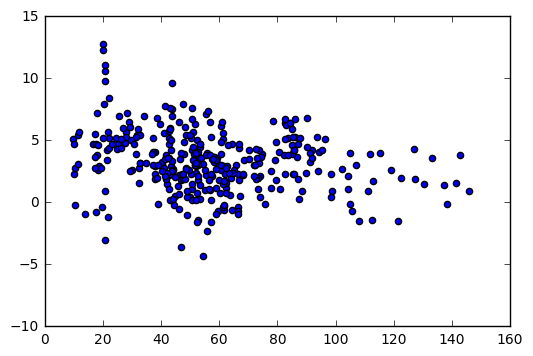

In [53]:
plt.scatter(X,y)
plt.show()

In [54]:
B1 = sum((X - np.mean(X)) * (y - np.mean(y))) / sum((X - np.mean(X))**2)
B0 = np.mean(y) - (B1 * np.mean(X))
print(B0, B1)

4.39257149108 -0.0199443448184


In [55]:
# alternatively
B1, B0 = np.polyfit(X, y, 1)
print(B0, B1)

4.39257149108 -0.0199443448184


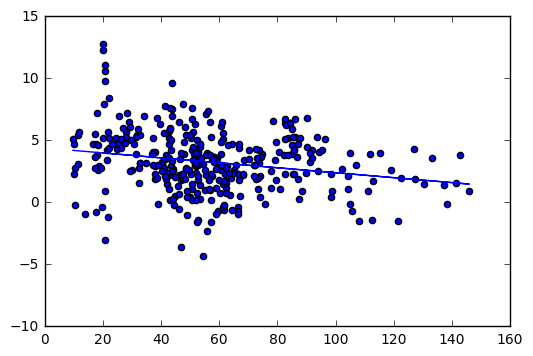

In [56]:
# Create a list of values in the best fit line
abline_values = [B1 * i + B0 for i in X]

# Plot the best fit line over the actual values
plt.scatter(X,y)
plt.plot(X, abline_values, 'b')
plt.show()

In [57]:
y_hat = 0.4 + (0.8 * X)
print(y_hat)

[   8.0983248    8.3868368    8.471296     8.748744     8.79628      9.422616
    9.374168     9.81364     11.41804     14.338608    13.617688
   14.187936    14.432792    14.940728    16.18628     17.608456    16.83116
   15.255776    14.652704    14.823192    14.162968    14.18476     15.035344
   15.9308208   16.9106912   31.163736    32.529336    33.252592
   34.614792    35.732264    35.47992     34.542504    35.507776
   37.532344    40.794648    38.929296    37.297328    38.802488
   41.381248    44.345624    45.017288    43.86        39.26684     39.121664
   43.21876     43.84656     43.16888     42.125464    42.061916
   40.3459808   30.74552     30.664256    30.610368    33.940368
   34.638312    35.667472    35.208552    34.693768    39.45824     48.102696
   42.408296    45.899904    47.651992    44.825072    45.031144    42.4108
   40.836688    41.225272    42.618576    46.861312    46.46628     43.21868
   42.52012     40.5985456   42.284776    70.04716     68.759776
   

In [58]:
y_err = y_hat - y
print(y_err)

[   2.9871841    6.1095539    3.771296     5.948744     8.99628      6.322616
    3.974168     4.11364     12.31804     15.138608     8.917688
    8.687936     9.732792    12.340728    16.58628     14.208456    19.83116
   12.355776     7.452704    11.023192    11.362968    10.48476     10.435344
   13.1308208   16.0106912   24.3615684   29.6056902   27.652592
   29.414792    33.132264    28.47992     28.742504    28.007776
   34.032344    39.694648    32.829296    35.097328    34.902488
   37.981248    43.345624    41.017288    48.16        36.46684     33.721664
   38.51876     40.74656     38.66888     37.125464    39.661916
   39.9459808   28.8684217   28.4091909   26.510368    32.440368
   32.438312    32.967472    32.908552    27.093768    40.45824     48.802696
   38.608296    44.899904    44.051992    42.625072    47.331144    43.8108
   39.336688    37.825272    40.818576    43.161312    42.96628     38.51868
   38.42012     38.2985456   41.484776    68.1700617   66.5047109
  

In [59]:
y_err_sq = y_err**2
print(y_err_sq)

[  8.92326885e+00   3.73266489e+01   1.42226735e+01   3.53875552e+01
   8.09330538e+01   3.99754731e+01   1.57940113e+01   1.69220340e+01
   1.51734109e+02   2.29177452e+02   7.95251593e+01   7.54802319e+01
   9.47272401e+01   1.52293568e+02   2.75104684e+02   2.01880222e+02
   3.93274907e+02   1.52665201e+02   5.55427969e+01   1.21510762e+02
   1.29117042e+02   1.09930192e+02   1.08896404e+02   1.72418455e+02
   2.56342233e+02   5.93486015e+02   8.76496892e+02   7.64665844e+02
   8.65229988e+02   1.09774692e+03   8.11105843e+02   8.26131536e+02
   7.84435516e+02   1.15820044e+03   1.57566508e+03   1.07776268e+03
   1.23182243e+03   1.21818367e+03   1.44257520e+03   1.87884312e+03
   1.68241791e+03   2.31938560e+03   1.32983042e+03   1.13715062e+03
   1.48369487e+03   1.66028215e+03   1.49528228e+03   1.37830008e+03
   1.57306758e+03   1.59568138e+03   8.33385771e+02   8.07082128e+02
   7.02799611e+02   1.05237748e+03   1.05224409e+03   1.08685421e+03
   1.08297279e+03   7.34072264e+02

In [60]:
RMSE = (sum(y_err_sq) / len(y))**.5
print(RMSE)

48.2043713964


In [61]:
RMSE == (sum((y_hat-y)**2) / len(y))**.5

True

In [62]:
X_reg = np.array([[x] for x in X])

In [63]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_reg, y)
print(reg.coef_[0])
print(reg.intercept_)

-0.0199443448184
4.39257149108


In [64]:
round(B1, 5) == round(reg.coef_[0], 5)

True

In [65]:
round(B0, 5) == round(reg.intercept_, 5)

True

## PolynomialReg

In [66]:
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X_reg)

In [67]:
X_

array([[  1.00000000e+00,   9.62290600e+00,   9.26003199e+01,
          8.91084174e+02],
       [  1.00000000e+00,   9.98354600e+00,   9.96711907e+01,
          9.95071918e+02],
       [  1.00000000e+00,   1.00891200e+01,   1.01790342e+02,
          1.02697498e+03],
       ..., 
       [  1.00000000e+00,   2.17123500e+01,   4.71426143e+02,
          1.02357694e+04],
       [  1.00000000e+00,   2.31287970e+01,   5.34941251e+02,
          1.23725476e+04],
       [  1.00000000e+00,   2.00003040e+01,   4.00012160e+02,
          8.00036481e+03]])

In [68]:
reg = linear_model.LinearRegression()
reg.fit (X_, y)
print(reg.coef_)
print(reg.intercept_)

[  0.00000000e+00  -1.19847375e-01   1.43002800e-03  -5.81790447e-06]
6.29171907437


In [69]:
pfit = np.polyfit(X, y, 3)

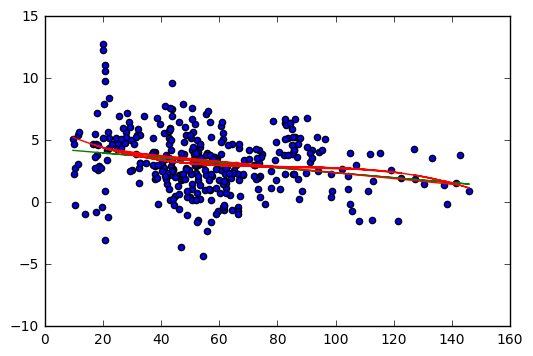

In [70]:
p = np.poly1d(pfit)
plt.scatter(X,y)
plt.plot(X, abline_values, '-', color="green")
plt.plot(X, p(X), '-', color="red")
plt.show()

In [71]:
# http://stackoverflow.com/questions/24612626/b-spline-interpolation-with-python
x = X

t = range(len(x))
ipl_t = np.linspace(0.0, len(x) - 1, 100)

x_tup = si.splrep(t, x, k=3)
y_tup = si.splrep(t, y, k=3)

x_list = list(x_tup)
xl = x.tolist()
x_list[1] = xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

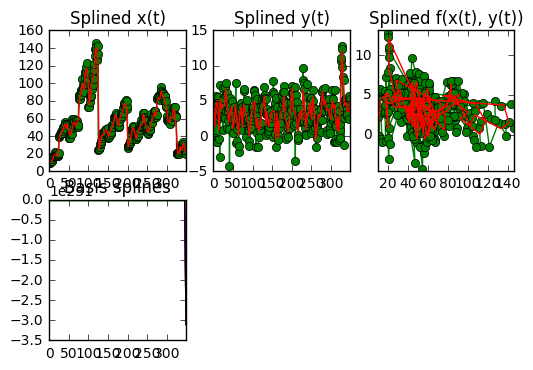

In [50]:
fig = plt.figure()

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(7):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i)
plt.xlim([0.0, max(t)])
plt.title('Basis splines')
plt.show()

## smooth splining

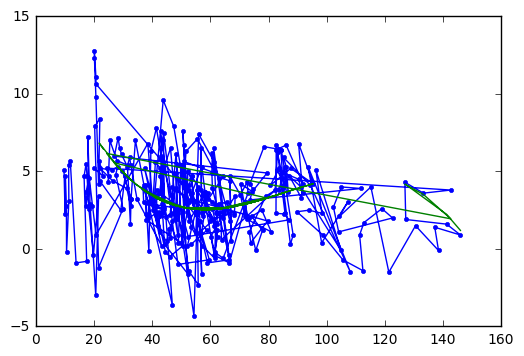

In [73]:
s = UnivariateSpline(x, y, s=1)
xs = x
ys = s(xs)
plt.plot(x, y, '.-')
#sorted(zip(xs, ys))
xs1 = [x[0] for x in sorted(zip(xs, ys))]
ys1 = [x[1] for x in sorted(zip(xs, ys))]
plt.plot(xs, ys)
plt.show()